# Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted


## Business Goal 

1. Build a model which will  assign a lead score to each of the leads such that 
    - The customers with higher lead score have a higher conversion chance and 
    - The customers with lower lead score have a lower conversion chance
2. Help company to select the most promising leads, i.e. the leads that are most likely to convert into paying customers
3. Ballpark of the target lead conversion rate to be around 80%.

## The steps we will follow in this excercise as follows

1. Reading and Understanding Data set
2. Data Cleaning <br>
    2.1 Handling the "Select" option from Categorical features <br>
    2.2 Dropping columns with high percentage of missing values<br>
    2.3 Categorical features Analysis and Handling the unique categories<br>
    2.4 Numerical features Analysis and imputing null values<br>
3. Prepare the data for Modelling<br>
    3.1 Convert binary categorical column to numeric<br>
    3.2 Creation of dummies for categorical columns<br>
    3.3 Handling Numerical Columns Outliers<br>
    3.4 Perform Train-Test split<br>
    3.5 Perform Scaling<br>
4. Modelling<br>
    4.1 Buliding Logistic Regression Model on all the features<br>
    4.2 Buliding Logistic Regression Model using RFE <br>
    4.3 Finding the Optimal probability cutoff<br>
    4.4 Final Predection on Train data set using Optimal Cutoff<br>
    4.5 Model Evaluation on Test data set<br>
    4.6 Genearting Lead Score on Test data set
5. Final Analysis and Recommendation

__Authors__
*    S S B Phani Pradeep Miriyala
*    Chandra Sekhar Reddy Kandimalla

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data set

In [2]:
# Reading the data and checking the data set
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Inspecting the shape of the data set
data.shape

(9240, 37)

In [4]:
# Inspect data for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#describing the data set
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### We can notice that there are 
1. 7 Continous features
2. 30 Categorical features

In [6]:
# Checking the Conversion Rate in original Data set
data.groupby('Converted').count()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Converted,,,,,,,,,,,,,,,,,,,,,
0,5679,5679,5679,5672,5679,5679,5642,5679,5642,5657,...,5679,3340,4413,3114,3114,3114,3114,5679,5679,5679
1,3561,3561,3561,3532,3561,3561,3461,3561,3461,3480,...,3561,3191,3407,1908,1908,1908,1908,3561,3561,3561


#### We can see that there is 38.5% conversion rate in the original data set

1. Non Converted (0) : <b>5679</b>
2. Converted (1) : <b>3561</b>


__Conversion % : (3525/9240)  = 38.5%__

## Step 2: Data Cleaning

### 2.1 Handling the "Select" option from Categorical features

In [7]:
#Lets check the categorical columns
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Inspecting Categorical columns which has default option as Select
categorical_columns=['Lead Origin','Lead Source','Last Activity','Country',
                     'Specialization','How did you hear about X Education',
                     'What is your current occupation','What matters most to you in choosing a course',
                     'Tags','Lead Quality','Lead Profile','City','Last Notable Activity']                                                                                 
Options_Select=[]
for item in categorical_columns:
    temp=data[item].unique()
    if temp[0]== 'Select':
        Options_Select.append(item)
print('List of columns with entry "Select" : ')
print(Options_Select)

List of columns with entry "Select" : 
['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


#### We can notice that the below are the categorical columns which are having the default option as "Select"
1. Specialization
2. How did you hear about X Education
3. Lead Profile
4. City

Lets check the count of the Select options  from the above features

In [9]:
# Inspecting the # of records with Select as a value in " How did you hear about X Education" feature
data['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [10]:
# Inspecting the # of records with Select as a value in " Lead Profile" feature
data['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [11]:
# Inspecting the # of records with Select as a value in " Specialization" feature
data['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [12]:
# Inspecting the # of records with Select as a value in " City" feature
data['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can observe that many records are having Select as an option in the above features.

We can Consider these as NaN, as Select as no meaning for these records

In [13]:
# Replace the values "Select" with nan as the value of "Select" has no meaning.
data.loc[data['How did you hear about X Education']=='Select','How did you hear about X Education']=np.nan
data.loc[data['Lead Profile']=='Select','Lead Profile']=np.nan
data.loc[data['Specialization']=='Select','Specialization']=np.nan
data.loc[data['City']=='Select','City']=np.nan

### 2.2 Dropping columns with high percentage of missing values

In [14]:
# Check the null count
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
# lets check the null percentage
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
# There are several missing values in multiple columns.
# Get columns whose missing values are too high. 
# These columns where missing values are above 40% won't be of use for analysis.
na_cols = data.columns[100*data.isnull().sum()/data.shape[0]>40]
na_cols

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [17]:
# Lets Drop the columns which are having >40% of null values
data.drop(na_cols,axis=1,inplace=True)

In [18]:
# lets Re check the null percentage
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### 2.3 Categorical features Analysis and Handling the unique categories

In [19]:
# Let us look at number of unique values.
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [20]:
# Both columns Prospect ID and Lead Number uniquely identify a customer. 
# These columns will not have any impact on analysis
data.drop(['Prospect ID'],axis=1,inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 

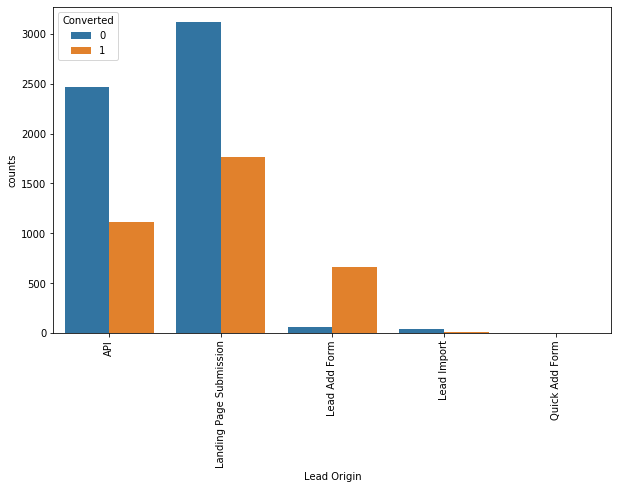

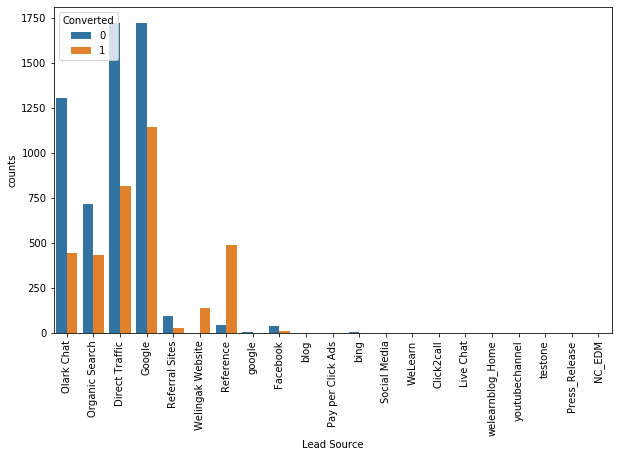

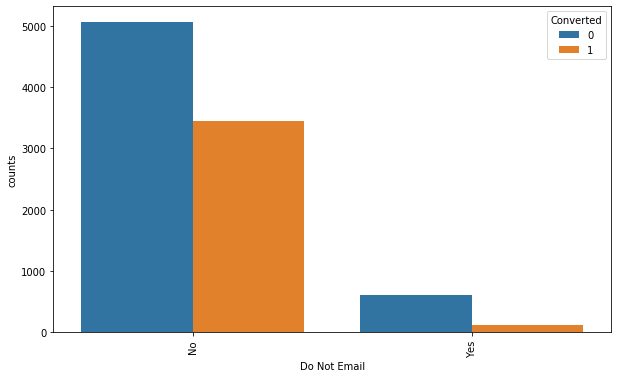

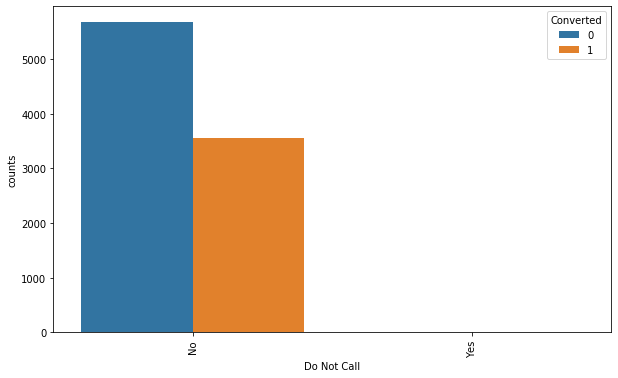

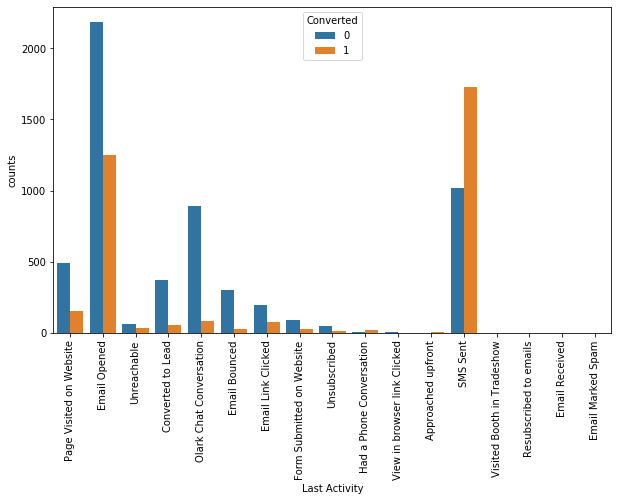

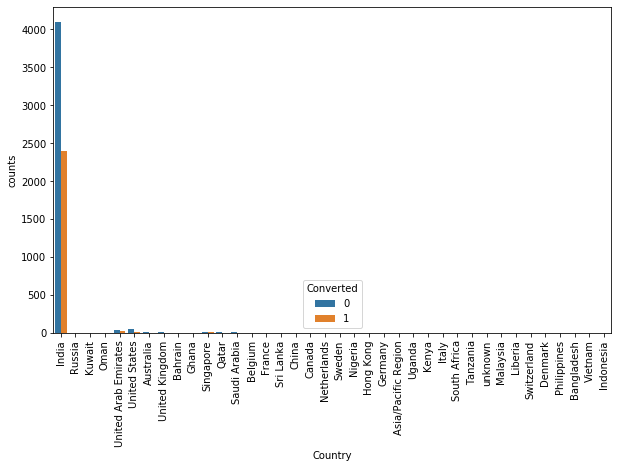

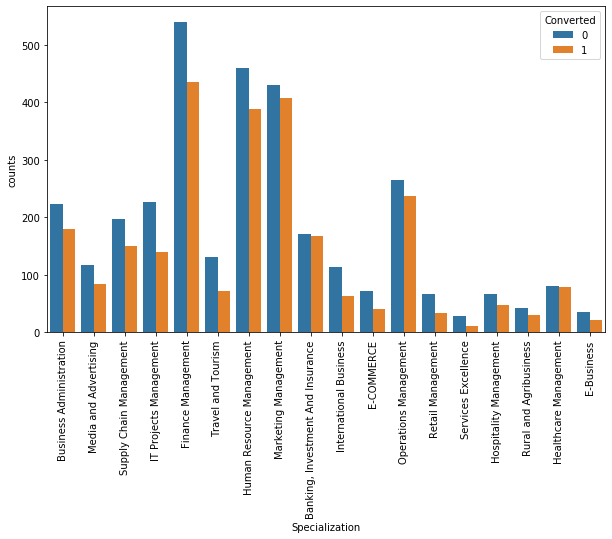

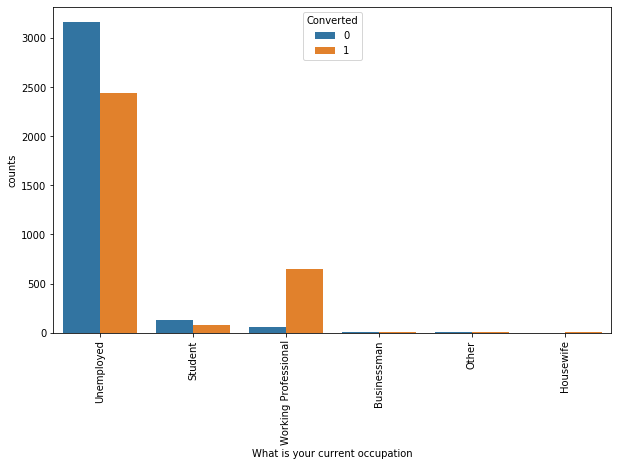

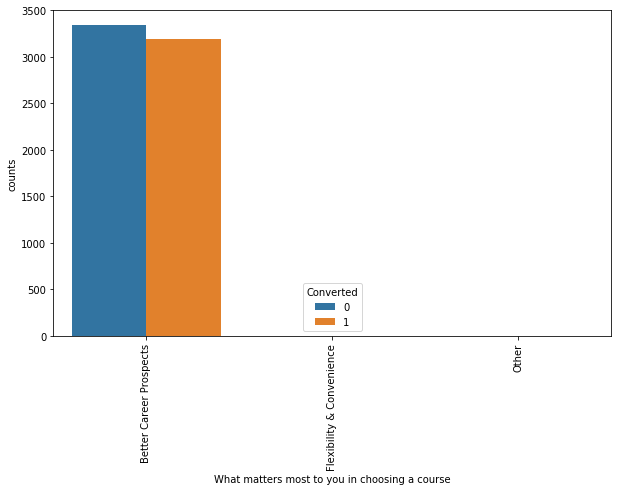

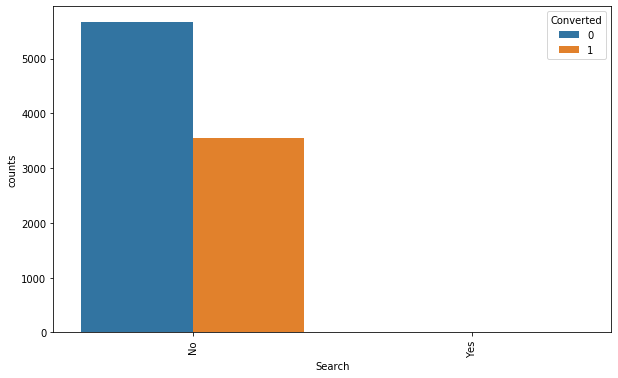

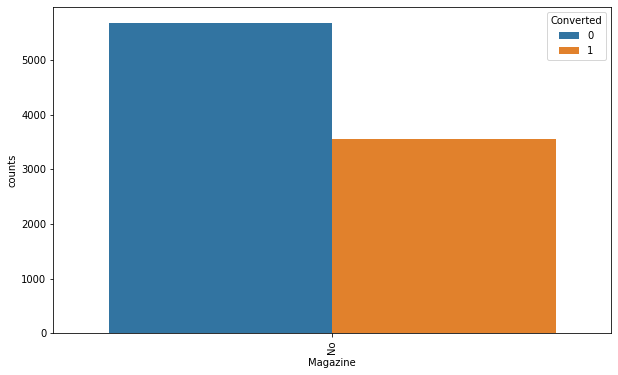

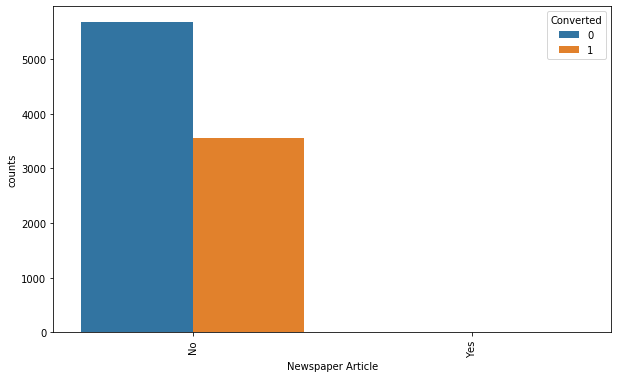

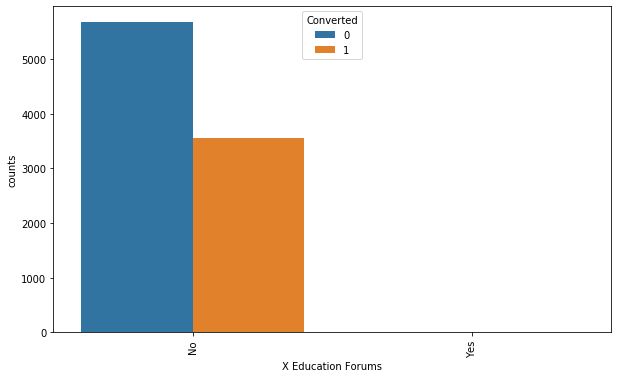

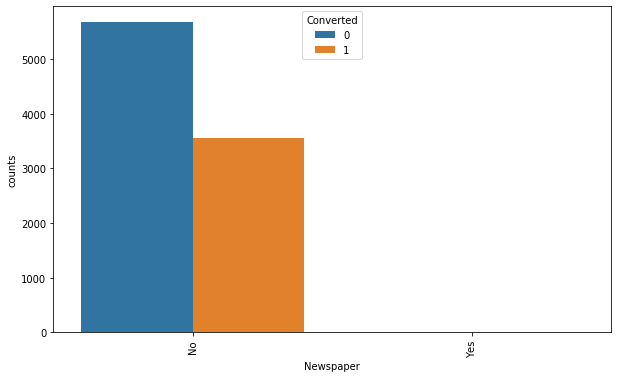

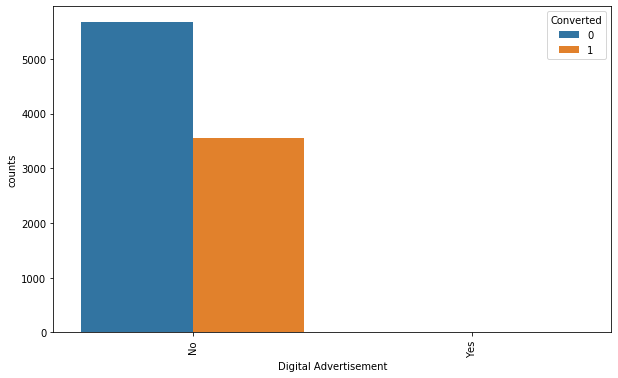

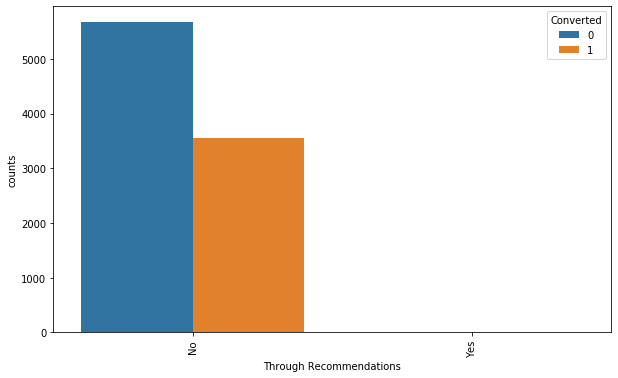

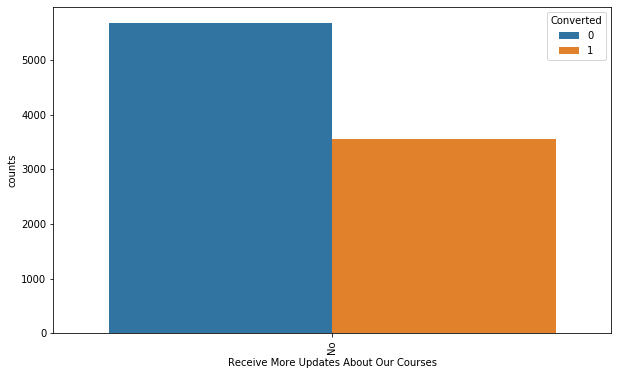

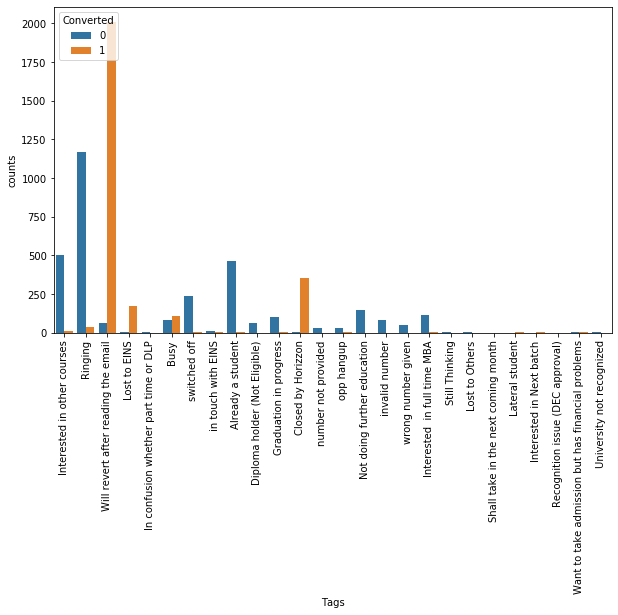

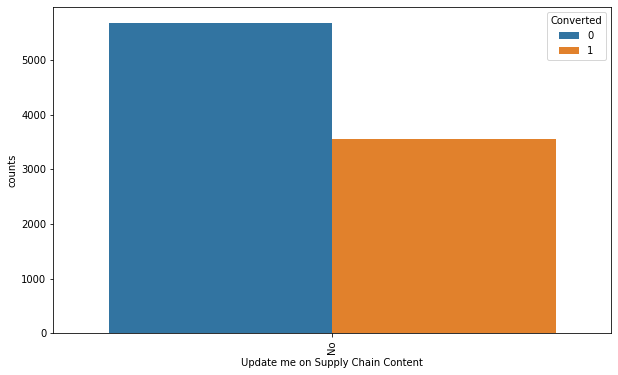

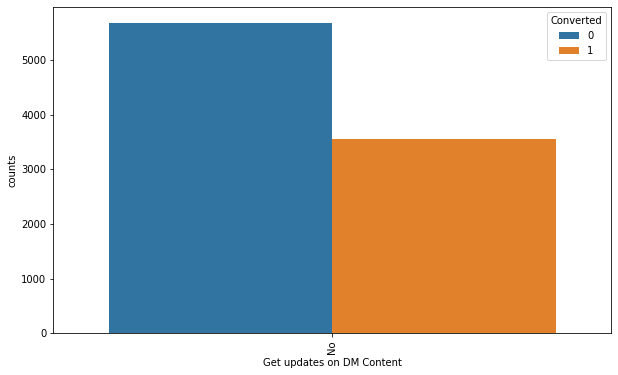

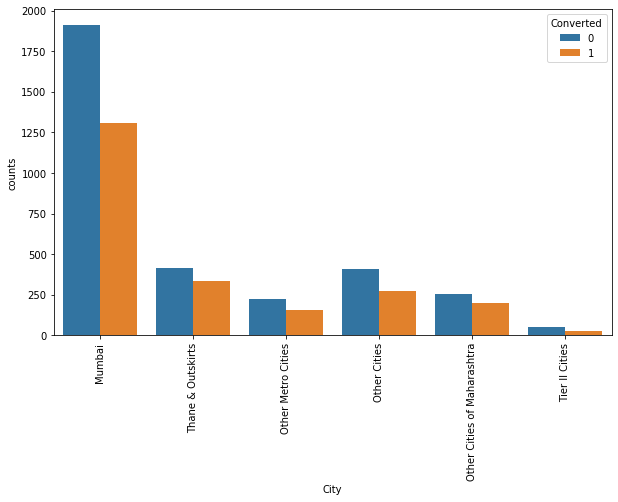

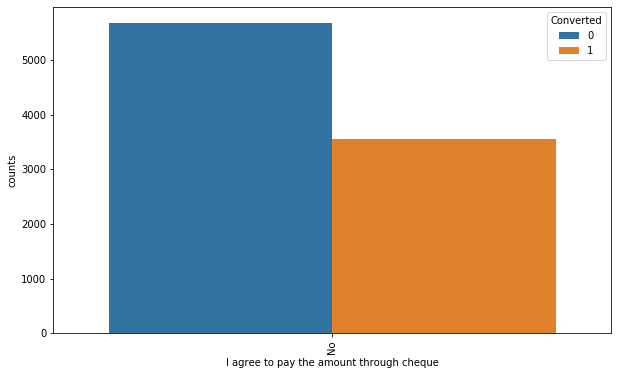

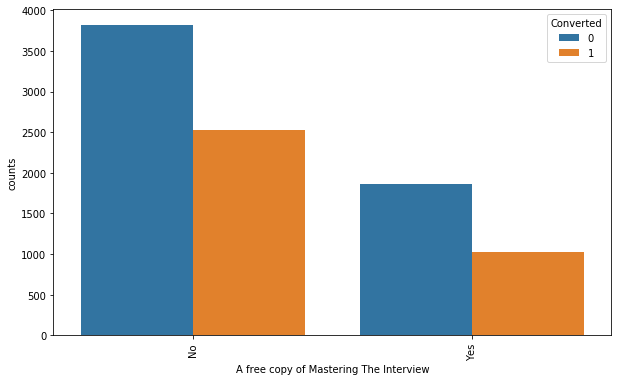

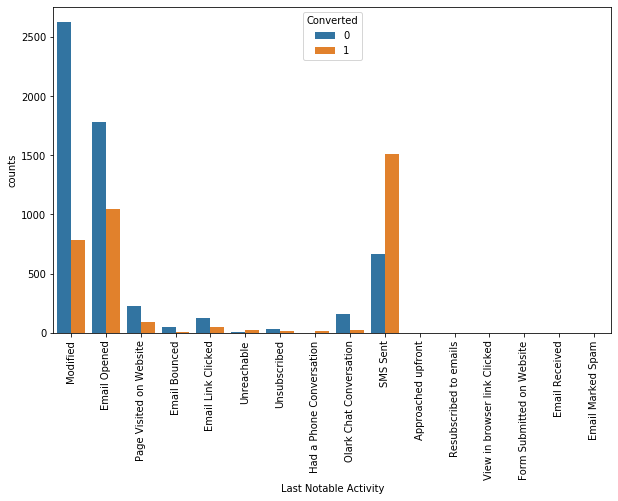

In [22]:
# Categorical variables analysis
# The categorical columns are:
cat_cols = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity',
            'Country','Specialization','What is your current occupation',
            'What matters most to you in choosing a course','Search','Magazine',
            'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations','Receive More Updates About Our Courses','Tags',
            'Update me on Supply Chain Content','Get updates on DM Content','City',
            'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview','Last Notable Activity'
           ]
def cat_plot(dataset,colname,tgt_col):
    plt.figure(figsize=(10,6))
    sns.countplot(dataset[colname],hue=dataset[tgt_col])
    plt.xticks(rotation=90)
    plt.ylabel('counts')
    plt.xlabel(colname)
    plt.show()
for x in cat_cols:
    cat_plot(data,x,'Converted')

In [23]:
# Look at "Lead Origin" unique values.
data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [24]:
# Both "Lead Add Form" and "Quick Add Form" have similar meaning. We can combine these.
data.loc[data['Lead Origin']=='Quick Add Form','Lead Origin']='Lead Add Form'

In [25]:
# Verify the count of unique values
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: Lead Origin, dtype: int64

We can observe No Missing Values in the Lead Origin Feature

In [26]:
# Lets Look at unique values of Next Categorical Feature
# Column : Lead Source
data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [27]:
# There are two duplications "google" and "welearnblog_Home"
data.loc[data['Lead Source']=='google','Lead Source']='Google'
data.loc[data['Lead Source']=='welearnblog_Home','Lead Source']='WeLearn'

In [28]:
# Verify the count of unique values
data['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Live Chat               2
WeLearn                 2
Press_Release           2
Social Media            2
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

#### We can observe
1. There are some unique values whose presence is almost negligible. <b>We can combine all of them together into one bucket "Other"</b>

In [29]:
# Combining all records to "Other" whose counts are < 50
counts = data['Lead Source'].value_counts(dropna=False)
data['Lead Source'] = np.where(data['Lead Source'].isin(counts.index[counts >= 50 ]), data['Lead Source'], 'Other')

#Verifying the count of unique Values
data['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 59
Facebook              55
Name: Lead Source, dtype: int64

In [30]:
# Lets Look at unique values of Next Categorical Feature
# Column last activity
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### We can observe
1. 103 Records with NAN value - <b>Re Name these to Unknown Category </b>
2. There are some unique values whose presence is almost negligible.<b> We can combine all of them together into one bucket "Other"</b>

In [31]:
# Renaming records with NaN value to Unknown Category
data['Last Activity'].fillna('Unknown',inplace=True)

# Combining all records to "Other" whose counts are < 50
counts = data['Last Activity'].value_counts(dropna=False)
data['Last Activity'] = np.where(data['Last Activity'].isin(counts.index[counts >= 50 ]), data['Last Activity'], 'Other')

#Verifying the count of unique Values
data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unknown                       103
Unreachable                    93
Unsubscribed                   61
Other                          51
Name: Last Activity, dtype: int64

In [32]:
# Lets Look at unique values of Next Categorical Feature
# Column: Last Notable Activity

data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

#### We can observe
1. There are some unique values whose presence is almost negligible.<b> We can combine all of them together into one bucket "Other"</b>

In [33]:
# Combining all records to "Other" whose counts are < 50
counts = data['Last Notable Activity'].value_counts(dropna=False)
data['Last Notable Activity'] = np.where(data['Last Notable Activity'].isin(counts.index[counts >= 50 ]), data['Last Notable Activity'], 'Other')

#Verifying the count of unique Values
data['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       100
Email Bounced                60
Name: Last Notable Activity, dtype: int64

In [34]:
# Lets Look at unique values of Next Categorical Feature
# Column: Country

# From plot of Country, we can see that majority of clicks are from India. 
# Rest of world can be either grouped as one big entry or grouped by continent.
# Further when we combine known information from City to derive Country, we can replace some of NAs in country column.
data.loc[data['City']=='Thane & Outskirts','Country']='India'
data.loc[data['City']=='Other Cities of Maharashtra','Country']='India'
data.loc[data['City']=='Mumbai','Country']='India'
data['Country'].value_counts(dropna=False)

India                   6963
NaN                     2127
United Arab Emirates      32
United States             29
Singapore                 13
Saudi Arabia              11
United Kingdom             5
Qatar                      5
unknown                    5
Nigeria                    4
Australia                  4
France                     4
South Africa               4
Oman                       4
Bahrain                    3
Hong Kong                  3
Bangladesh                 2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Kuwait                     2
Sweden                     2
Russia                     1
Germany                    1
Kenya                      1
Liberia                    1
Tanzania                   1
Sri Lanka                  1
China                      1
Canada                     1
Denmark                    1
Philippines                1
Name: Country, dtype: int64

In [35]:
# Replacing cities with Conitent Name in the country Feature
data['Country'] = data['Country'].replace('Switzerland', 'Europe')
data['Country'] = data['Country'].replace('Denmark', 'Europe')
data['Country'] = data['Country'].replace('Russia', 'Europe')
data['Country'] = data['Country'].replace('Belgium', 'Europe')
data['Country'] = data['Country'].replace('Italy', 'Europe')
data['Country'] = data['Country'].replace('Netherlands', 'Europe')
data['Country'] = data['Country'].replace('Sweden', 'Europe')
data['Country'] = data['Country'].replace('Germany', 'Europe')
data['Country'] = data['Country'].replace('France', 'Europe')
data['Country'] = data['Country'].replace('United Kingdom', 'Europe')

data['Country'] = data['Country'].replace('United Arab Emirates', 'Middle East')
data['Country'] = data['Country'].replace('Saudi Arabia', 'Middle East')
data['Country'] = data['Country'].replace('Qatar', 'Middle East')
data['Country'] = data['Country'].replace('Oman', 'Middle East')
data['Country'] = data['Country'].replace('Bahrain', 'Middle East')
data['Country'] = data['Country'].replace('Kuwait', 'Middle East')

data['Country'] = data['Country'].replace('United States', 'North America')
data['Country'] = data['Country'].replace('Canada', 'North America')

data['Country'] = data['Country'].replace('Nigeria', 'Africa')
data['Country'] = data['Country'].replace('Ghana', 'Africa')
data['Country'] = data['Country'].replace('Uganda', 'Africa')
data['Country'] = data['Country'].replace('Kenya', 'Africa')
data['Country'] = data['Country'].replace('Tanzania', 'Africa')
data['Country'] = data['Country'].replace('Liberia', 'Africa')
data['Country'] = data['Country'].replace('South Africa', 'Africa')

data['Country'] = data['Country'].replace('Singapore', 'South & South-East Asia')
data['Country'] = data['Country'].replace('Hong Kong', 'South & South-East Asia')
data['Country'] = data['Country'].replace('Asia/Pacific Region', 'South & South-East Asia')
data['Country'] = data['Country'].replace('China', 'South & South-East Asia')
data['Country'] = data['Country'].replace('Philippines', 'South & South-East Asia')

In [36]:
data['Country'].value_counts(dropna=False)

India                      6963
NaN                        2127
Middle East                  57
North America                30
South & South-East Asia      20
Europe                       16
Africa                       15
unknown                       5
Australia                     4
Bangladesh                    2
Sri Lanka                     1
Name: Country, dtype: int64

#### We can observe
1. 2127 Records with NAN value - <b>We can assume that when country is missing, it will be India. This is because the website has users mainly from India </b>
2. There are some unique values whose presence is almost negligible.<b> We can combine all of them together into one bucket "Other"</b>

In [37]:
# Renaming records with NaN value to India 
data['Country'].fillna('India',inplace=True) 

# Combining all records to "Other" whose counts are < 60
counts = data['Country'].value_counts(dropna=False)
data['Country'] = np.where(data['Country'].isin(counts.index[counts >= 60 ]), data['Country'], 'Other')
data['Country'].value_counts(dropna=False)

India    9090
Other     150
Name: Country, dtype: int64

After making the above changes, we can observe country feature is heavily skewed and will not have any signficance in Model 

In [38]:
# Dropping country feature from data set
data.drop(['Country'],axis=1,inplace=True)

In [39]:
# Lets Look at unique values of Next Categorical Feature
# Column: Specialization

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### We can observe
1. 3380 Records with NAN value - <b>We can rename these to Unspecified </b>


In [40]:
# Replace NANs with "Unspecified"
data['Specialization'].fillna('Unspecified',inplace=True)

In [41]:
# By description of this column (Specialization), it is not desirable to group categories into one.

In [42]:
# Lets Look at unique values of Next Categorical Feature
# Column 'What is your current occupation'
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### We can observe
1. 2690 Records with NAN value - <b>We can rename these to Unspecified </b>
2. There are some unique values whose presence is almost negligible.<b> We can combine all of them together into one bucket "Other"</b>

In [43]:
# Replace NANs with "Unspecified"
data['What is your current occupation'].fillna('Unspecified',inplace=True)

# Combining all records to "Other" whose counts are < 50
counts = data['What is your current occupation'].value_counts(dropna=False)
data['What is your current occupation'] = np.where(data['What is your current occupation'].isin(counts.index[counts >= 50 ]), data['What is your current occupation'], 'Other')

# Verifying the value counts
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Unspecified             2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [44]:
# Lets Look at unique values of Next Categorical Feature
# Column 'What matters most to you in choosing a course'

data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### We can observe
1. 2709 Records with NAN value - <b>We can rename these to Unspecified </b>


In [45]:
# Replace missing values with "Unspecified"
data['What matters most to you in choosing a course'].fillna('Unspecified',inplace=True)

# Verifying the value counts
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Unspecified                  2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
# Lets Look at unique values of Next Categorical Feature
# Column 'Tags'
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### We can observe
1. 3353 Records with NAN value - <b>We can rename these to No Tags </b>
2. There are some categories that can be clubbed together.<b> Busy, switched off, opp hangup, wrong number given, number not provided- these can be clubbed to Not Reachable</b>
3. There are some unique values whose presence is almost negligible.<b> We can combine all of them together into one bucket "Other"</b>

In [47]:
# Fill missing values with "No tags"
data['Tags'].fillna('No Tags',inplace=True)

In [48]:
# There are some categories that can be clubbed together.
# Busy, switched off, opp hangup, wrong number given, number not provided
data['Tags'] = data['Tags'].replace('wrong number given', 'Not reachable')
data['Tags'] = data['Tags'].replace('Busy', 'Not reachable')
data['Tags'] = data['Tags'].replace('switched off', 'Not reachable')
data['Tags'] = data['Tags'].replace('opp hangup', 'Not reachable')
data['Tags'] = data['Tags'].replace('number not provided', 'Not reachable')
data['Tags'] = data['Tags'].replace('invalid number', 'Not reachable')

#Verifying value counts
data['Tags'].value_counts(dropna=False)

No Tags                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Not reachable                                         616
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
Diploma holder (Not Eligible)                          63
in touch with EINS                                     12
Lost to Others                                          7
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in 

In [49]:
# We can group all categories that have less counts into one group "Other"
counts = data['Tags'].value_counts(dropna=False)
data['Tags'] = np.where(data['Tags'].isin(counts.index[counts >= 60 ]), data['Tags'], 'Other')
data['Tags'].value_counts(dropna=False)

No Tags                                3353
Will revert after reading the email    2072
Ringing                                1203
Not reachable                           616
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Diploma holder (Not Eligible)            63
Other                                    49
Name: Tags, dtype: int64

In [50]:
# Lets Look at unique values of Next Categorical Feature
# Column City
data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [51]:
# Fill missing values with "Not Specified"
data['City'].fillna('Not Specified',inplace=True)
# Combine Other Cities together.
data.loc[data['City']=='Other Cities of Maharashtra','City']='Other Cities'
# Mumbai and Thane are less than 30km apart.
data.loc[data['City']=='Thane & Outskirts','City']='Mumbai'
# Club Tier II Cities with Other Cities.
data.loc[data['City']=='Tier II Cities','City']='Other Cities'
# Club Other Metro Cities with Other Cities
data.loc[data['City']=='Other Metro Cities','City']='Other Cities'
data['City'].value_counts(dropna=False)

Mumbai           3974
Not Specified    3669
Other Cities     1597
Name: City, dtype: int64

In [52]:
# Looking at numbers, a majority of city information is as good as missing 
# (Sum of Not Specified and Other Cities) = 5266/9240 = 57%.
# Hence, dropping the column.
data.drop(['City'],axis=1,inplace=True)

#### Binary and Unary Categorical Column Analysis

In [53]:
# Binary Categorical columns with options as Yes or No
y_n_cols = ['Do Not Email','Do Not Call','Search','Magazine',
            'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview']
data[y_n_cols].nunique()

Do Not Email                                2
Do Not Call                                 2
Search                                      2
Magazine                                    1
Newspaper Article                           2
X Education Forums                          2
Newspaper                                   2
Digital Advertisement                       2
Through Recommendations                     2
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
A free copy of Mastering The Interview      2
dtype: int64

In [54]:
# Clearly the columns that do not change at all, have no use for analysis. We will drop these columns
# Statement split to improve readability ONLY.
data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content'],axis=1,inplace=True)
data.drop(['Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [55]:
# Let us revisit this  Y/N columns
data['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [56]:
data['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [57]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['Do Not Call'],axis=1,inplace=True)

In [58]:
data['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [59]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['Search'],axis=1,inplace=True)

In [60]:
data['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['Newspaper Article'],axis=1,inplace=True)

In [62]:
data['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [63]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['X Education Forums'],axis=1,inplace=True)

In [64]:
data['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [65]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['Newspaper'],axis=1,inplace=True)

In [66]:
data['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [67]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['Digital Advertisement'],axis=1,inplace=True)

In [68]:
data['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
# As we can see, the number of Yeses, are too negligible. 
# Which means this column can be considered as if entire column values are "No". Thus the column can be dropped.
data.drop(['Through Recommendations'],axis=1,inplace=True)

In [70]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### 2.4  Numerical Feature Analysis

In [71]:
# Remaining columns after categorical variable analysis are,
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [72]:
# Check for missing values.
data.isnull().sum()

Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Tags                                               0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

In [73]:
# Describing the features which are having null values
data[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [74]:
# Impute the values of TotalVisits and Page Views Per Visit with integer value of mean. 
# Note that, these columns are integer in nature.
data['TotalVisits'].fillna(3,inplace=True)
data['Page Views Per Visit'].fillna(2,inplace=True)

In [75]:
# Re Check for missing values.
data.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

## Step 3. Prepare the data for Modelling

In [76]:
# Verify Data Imbalance level
data['Converted'].value_counts(dropna=False)*100/len(data['Converted'])

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [77]:
data.nunique()

Lead Number                                      9240
Lead Origin                                         4
Lead Source                                         9
Do Not Email                                        2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      12
Specialization                                     19
What is your current occupation                     5
What matters most to you in choosing a course       4
Tags                                               13
A free copy of Mastering The Interview              2
Last Notable Activity                               8
dtype: int64

### 3.1 Convert binary categorical column to numeric

In [78]:
# Convert the columns "Do Not Email" and "A free copy of Mastering The Interview" to numeric 1 (=Yes) and 0 (=No)
data['Do Not Email']=data['Do Not Email'].apply(lambda x:1 if x=='Yes' else 0)
data['A free copy of Mastering The Interview']=data['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)

### 3.2 Creation of dummies for categorical columns

In [79]:
# For remaining categorical values, create dummies.
dummies = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
        'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 
            'Last Notable Activity']], drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unspecified,...,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unspecified,...,0,1,0,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,1,0,1,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,1,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unspecified,...,0,0,1,0,0,1,0,0,0,0


In [80]:
# Since dummies created, drop original columns
data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
        'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 
            'Last Notable Activity'], axis=1,inplace=True)

In [81]:
# Re check the data set
data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### 3.3 Handling Numerical Columns Outliers

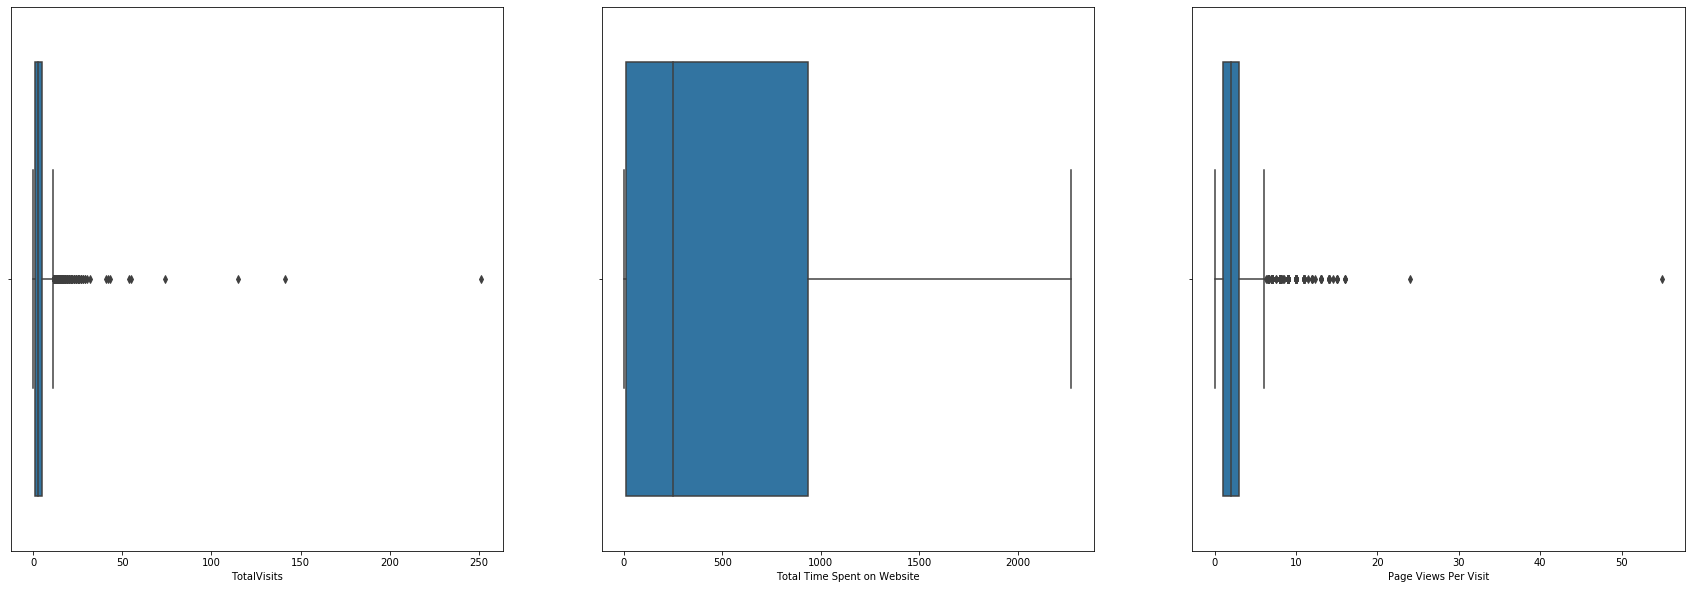

In [82]:
# Numerical columns in data are:
# TotalVisits
# Total Time Spent on Website
# Page Views Per Visit
plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
sns.boxplot(data['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(data['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(data['Page Views Per Visit'])
plt.show()

In [83]:
# There are few outliers on both total visits and page views per visit.
# For analysis purpose, we will drop these based on TotalVisits.
totalvisits_99p = data['TotalVisits'].quantile(0.99)
data = data[data['TotalVisits'] <= totalvisits_99p]

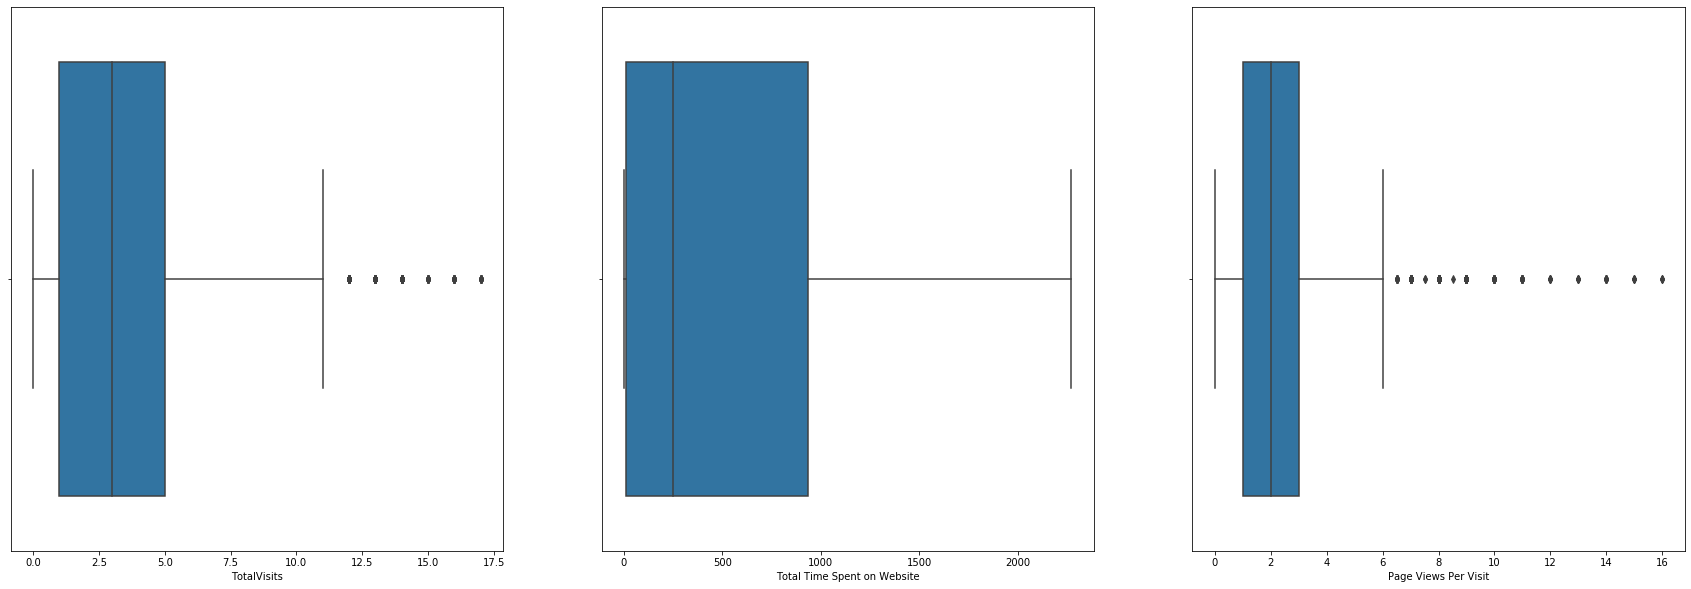

In [84]:
# Re plot the numerical columns after hanlding outliers
# TotalVisits
# Total Time Spent on Website
# Page Views Per Visit
plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
sns.boxplot(data['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(data['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(data['Page Views Per Visit'])
plt.show()

In [85]:
data.shape

(9157, 73)

### 3.4 Perform Train-Test split

In [86]:
# Reviweing the head of the data set before proceeding with Train / Test Split
data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


#### We Can observe, except the below features, all others are having values as 0 or 1
1. Lead Number - <b>Not required for Model building</b>
2. Converted -  <b>Target Feature</b>
3. TotalVisits - <b>Need to scale the feature</b>
4. Total Time Spent on Website - <b>Need to scale the feature</b>
3. Page Views Per Visit - <b>Need to scale the feature</b>  


In [87]:
# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Excluding Lead Number and Converted features to build the model
feature_cols = [x for x in data.columns if ((x!='Converted') and (x!='Lead Number'))]
X = data[feature_cols]
y = data['Converted']
RAND_STATE = 100
TRAIN_SIZE = 0.7

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RAND_STATE)

### 3.5 Perform Scaling

In [88]:
# We also must scale all numeric columns
import warnings
warnings.filterwarnings('ignore')
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = StandardScaler() # Can be reused for scaling test data.
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6490,0,-0.744597,-0.831303,-0.647913,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4026,1,-0.069711,-0.578290,-0.405762,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6453,0,2.967279,-0.130933,1.773595,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8949,0,0.942619,-0.594791,-0.405762,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
6467,0,2.629836,-0.767133,4.195103,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


## Step 4: Modelling

### 4.1 Buliding Logistic Regression Model on all the features

In [89]:
# imporring neccassary librraries for Logistic regression model using Stats model
import statsmodels.api as sm

# Creating the first model using stats library
logistic_mdl = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

# Viewing Model Summmary
logistic_mdl.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1147.9
Date:                Sun, 06 Sep 2020   Deviance:                       2295.9
Time:                        19:41:09   Pearson chi2:                 9.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -4.9429      1.572     -3.144      0.002      -8.025      -1.861
Do Not Email                                                               -1.0670      0.298     -3.577      0.000      -1.652      -0.482
TotalVisits                                                                 0.2298      0.089      2.570      0.010       0.055       0.405
Total Time Spent on Website                                                 1.0566      0.065     16.153      0.000       0.928       1.185
Page Views Per Visit                                                       -0.1210      0.091     -1.331      0.183      -0.299       0.057
A free copy of Mastering The Interview                                     -0.2483      0.185     -1.345      0.179      -0.610       0.114
Lead Origin_Landing Page Submission                                        -0.1884      0.247     -0.763      0.446      -0.672       0.296
Lead Origin_Lead Add Form                                                   1.2358      1.472      0.839      0.401      -1.650       4.121
Lead Origin_Lead Import                                                    21.2562   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                                      -21.5660   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                                          0.0392      0.191      0.205      0.837      -0.335       0.413
Lead Source_Olark Chat                                                      1.1886      0.259      4.582      0.000       0.680       1.697
Lead Source_Organic Search                                                  0.1008      0.217      0.465      0.642      -0.324       0.526
Lead Source_Other                                                           0.9857      1.098      0.898      0.369      -1.166       3.137
Lead Source_Reference                                                      -0.3904      1.511     -0.258      0.796      -3.351       2.571
Lead Source_Referral Sites                                                 -0.0342      0.498     -0.069      0.945      -1.011       0.942
Lead Source_Welingak Website                                                2.5960      1.637      1.586      0.113      -0.611       5.804
Last Activity_Email Bounced                                                -0.1225      0.717     -0.171      0.864      -1.527       1.282
Last Activity_Email Link Clicked                                            0.5944      0.769      0.773      0.440      -0.913       2.101
Las

There are several columns with P value more than 0.05 thus making these columns completely insignificant for model.


Since, there are several columns to process, we will use RFE library to filter out the columns that do not have sufficient support.



### 4.2 Buliding Logistic Regression Model using RFE 

In [90]:
# importing neccassary libraries for Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

# Chosing the  features for buliding model using RFE 

logreg = LogisticRegression()
rfe = RFE(logreg, 10)  # Taking 10 as the number of features for the model

rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 49),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 62),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Other', False, 12),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activity_Email Opened', False, 22),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other', False, 14),
 ('Last Activity_Page Visited on Website', False, 60),
 ('Last

In [91]:
# Columns that have support
col_w_support = X_train.columns[rfe.support_]
col_w_support

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Unspecified',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_No Tags',
       'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

### 4.3 Model rebuild
##### Rebuild the model using columns having RFE support

In [92]:
# Rebuild the model using the columns that have support.
X_train_sm = sm.add_constant(X_train[col_w_support])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1357.4
Date:                Sun, 06 Sep 2020   Deviance:                       2714.7
Time:                        19:41:13   Pearson chi2:                 1.15e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        -2.9947      0.136    -22.037      0.000      -3.261      -2.728
Lead Source_Welingak Website                                  2.8024      0.746      3.755      0.000       1.340       4.265
Last Activity_SMS Sent                                        2.2303      0.114     19.504      0.000       2.006       2.454
What matters most to you in choosing a course_Unspecified    -2.6342      0.144    -18.356      0.000      -2.915      -2.353
Tags_Closed by Horizzon                                       8.7091      0.729     11.952      0.000       7.281      10.137
Tags_Lost to EINS                                             8.5748      0.569     15.058      0.000       7.459       9.691
Tags_No Tags                                                  3.4412      0.171     20.131      0.000       3.106       3.776
Tags_Other                                                    2.1337      0.448      4.762      0.000       1.256       3.012
Tags_Ringing                                                 -1.9281      0.260     -7.414      0.000      -2.438      -1.418
Tags_Will revert after reading the email                      6.1822      0.201     30.807      0.000       5.789       6.575
Last Notable Activity_Modified                               -1.4659      0.118    -12.378      0.000      -1.698      -1.234
=============================================================================================================================
"""

#### All the features are significant in the model based on the p Value.

#### Lets review  VIF of features

In [93]:
# importing necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col_w_support].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_w_support].values, i) for i in range(X_train[col_w_support].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.11
3,Tags_Closed by Horizzon,1.06
4,Tags_Lost to EINS,1.05
6,Tags_Other,1.01
2,What matters most to you in choosing a course_...,0.20
8,Tags_Will revert after reading the email,0.16
1,Last Activity_SMS Sent,0.11
5,Tags_No Tags,0.08
7,Tags_Ringing,0.06
9,Last Notable Activity_Modified,0.04


There are no features with high VIF values.

The Model built is good based on the P value and VIF 

### 4.4 Finding the Optimal probability cutoff

In [94]:
# Calculating the probability of conversion
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.011424,6490
1,1,0.935642,4026
2,1,0.317694,6453
3,1,0.960361,8949
4,0,0.063421,6467


In [95]:
# Using a threshold of 0.5 probability initially.
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.011424,6490,0
1,1,0.935642,4026,1
2,1,0.317694,6453,0
3,1,0.960361,8949,1
4,0,0.063421,6467,0


#### Reviewing Confusion Matrix and Model Metrics

In [96]:
# Defining a function to be useful again when needed.
def print_metrics(confusion,accuracy):
    print('Confusion Matrix : ')
    print(confusion)
    
    # Print all metrics
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print('Accuracy: ', round(100*accuracy, 2),'%')
    print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2),'%')
    print('Specificity: ', round(100*(TN / float(TN+FP)), 2),'%')
    print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2),'%')
    print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2),'%')
    print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2),'%')
    print('Precision: ', round(100*(TP / float(TP + FP)), 2),'%')
    print('Recall: ', round(100*(TP / float(TP + FN)), 2),'%')

In [97]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
# Checking Model Accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print_metrics(confusion,accuracy)

Confusion Matrix : 
[[3705  224]
 [ 242 2238]]
Accuracy:  92.73 %
Sensitivity:  90.24 %
Specificity:  94.3 %
False positive rate:  5.7 %
Positive predictive value:  90.9 %
Negative predictive value:  93.87 %
Precision:  90.9 %
Recall:  90.24 %


####  ROC Curve plot

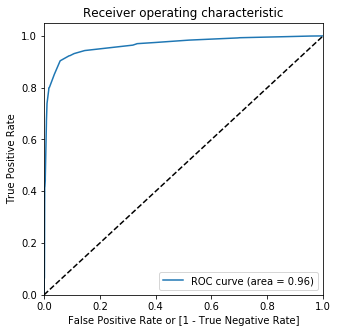

In [98]:
# Drawing ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

####  Determine Optimal cut-off point (Rather than earlier used 0.5)

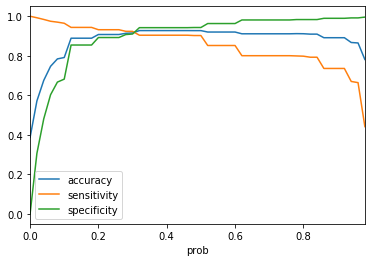

In [99]:
# Plotting Accuracy,Sensitivity,Specificity vs Probabilty
numbers = [float(x)/50 for x in range(50)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [100]:
# From plot we see that the intersection point is approximately 0.3. We can confirm this by looking at raw values.
# Select dataframe values where absolute differences between accuracy, sensitivity and specificity are less than 2%.
cutoff_df[(abs(cutoff_df.accuracy-cutoff_df.sensitivity)<0.02) & (abs(cutoff_df.accuracy-cutoff_df.specificity)<0.02) & (abs(cutoff_df.specificity-cutoff_df.sensitivity)<0.02)]

,prob,accuracy,sensitivity,specificity
0.28,0.28,0.913715,0.923790,0.907356
0.30,0.30,0.915275,0.923387,0.910155


In [101]:
# There are two values, but probability of 0.3 has better accuracy and specificty while maintaining same level of sensitivity.
# Hence, selecting optimal cut off as 0.3

### 4.5 Final Prediction on Train data set using Optimal Cutoff

Confusion Matrix : 
[[3576  353]
 [ 190 2290]]
Accuracy:  92.73 %
Sensitivity:  92.34 %
Specificity:  91.02 %
False positive rate:  8.98 %
Positive predictive value:  86.64 %
Negative predictive value:  94.95 %
Precision:  86.64 %
Recall:  92.34 %


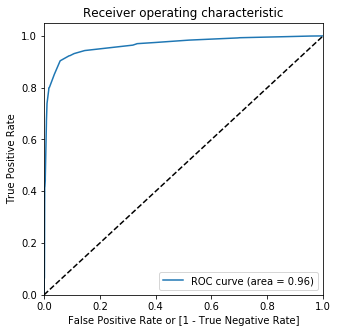

In [102]:
# Prediction using optimal cutoff 0.3
OPT_CUTOFF = 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > OPT_CUTOFF else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print_metrics(confusion,accuracy)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### 4.6 Model Evaluation on Test data set

In [103]:
# Scaling Test data set
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test = X_test[col_w_support]

In [104]:
# Predecting using Test data set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final = y_pred_final[['LeadID','Converted','Conv_Prob']]
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > OPT_CUTOFF else 0)
y_pred_final

,LeadID,Converted,Conv_Prob,final_predicted
0,7359,0,0.317694,1
1,2201,0,0.011424,0
2,2473,1,0.995583,1
3,8388,0,0.011424,0
4,2949,0,0.011424,0
...,...,...,...,...
2743,7308,0,0.100863,0
2744,3154,0,0.047667,0
2745,9118,0,0.317694,1
2746,8092,1,0.960361,1


Confusion Matrix : 
[[1567  136]
 [  82  963]]
Accuracy:  92.07 %
Sensitivity:  92.15 %
Specificity:  92.01 %
False positive rate:  7.99 %
Positive predictive value:  87.63 %
Negative predictive value:  95.03 %
Precision:  87.63 %
Recall:  92.15 %


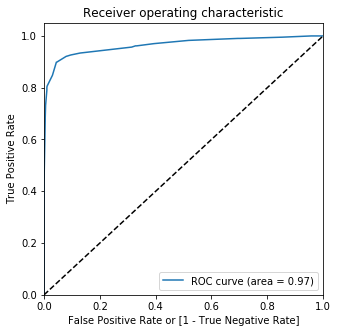

In [105]:
# Confusion Matrix for Test data set
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print_metrics(confusion,accuracy)
draw_roc(y_pred_final.Converted, y_pred_final.Conv_Prob)

In [106]:
# Conversion Rate
# Conversion rate will be ratio of number of people really converted to number of people predicted to be converted.
# Thus this is ratio of True-Positives to Total Positives predicted.
# With predicted values, this is
#  Converted people = True Positives
#  Total leads = Total Positives (TP + FP)
# Thus, conversion rate will be
conv_rate = 100*round(confusion[1,1]/(confusion[1,1]+confusion[0,1]),3)
print("Conversion Rate ",conv_rate)

Conversion Rate  87.6


### 4.7 Generating lead score on Test data set

#### Lead score is nothing but rounded integer of 100*Probability

In [107]:
# Calculating Lead score
y_pred_final = y_pred_final[['LeadID', 'Converted', 'Conv_Prob', 'final_predicted']]

data_pred = y_pred_final

data_pred['Lead_Score'] = data_pred['Conv_Prob'].apply(lambda x : round(x*100,2))
data_pred = data_pred.sort_values(by=['Lead_Score'], axis = 0, ascending = True)
data_pred.shape

(2748, 5)

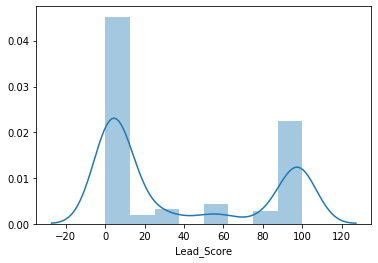

In [108]:
sns.distplot(data_pred.Lead_Score)
plt.show()

#### We can see from plot that, there are two gaussian distributions centered around 0 and 100. 
#### These correspond to class 0 (Not converted) and class 1 (Converted).

## Step 5: Final Analysis and Recommendations

### The below are the Features from the Final Model bulit
#### Positivily impactiing features 
1. Tags_Closed by Horizzon
2. Tags_Lost to EINS
3. Tags_Will revert after reading the emai
4. Tags_No Tags
5. Lead Source_Welingak Website
6. Last Activity_SMS Sent
7. Tags_Other

#### Negatively impactiing features 
1. What matters most to you in choosing a course_Unspecified
2. Tags_Ringing
3. Last Notable Activity_Modified


### Below is the Metric Summary on the Train data set

| METRIC | VALUE | 
| --- | --- |
| Accuracy |92.73%|
| Sensitivity |92.34%|
| Specificity |91.02% |
| Precision |86.64% |
| Recall |92.34%|

### Below is the Metric Summary on the Test data set

| METRIC | VALUE | 
| --- | --- |
| Accuracy |92.07%|
| Sensitivity |92.15% |
| Specificity |92.01% |
| Precision |87.63% |
| Recall |92.15% |



### Conversion Rate 

| Conversion Rate | VALUE | 
| --- | --- |
| With Model |87.6%|


### The Model Built is Good in predection based 

1. All the Metrics are almost similar for both Train and Test Data
2. Conversion Rate is  87%